In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv("/home/inventor/Datasets/Bike Sharing/bike_sharing/london_merged.csv")

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 10)

In [5]:
# Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
# Explore the features

print(f"Timestamp Feature : {df['timestamp'].value_counts()}")
print(f" Count Feature : {df["cnt"].value_counts()}")
print(f"t1 Feature : {df['t1'].value_counts()}")
print(f"t2 Feature : {df['t2'].value_counts()}")
print(f"hum Feature : {df['hum'].value_counts()}")
print(f"Wind Speed Feature : {df["wind_speed"].value_counts()}")
print(f"Weather Featture : {df["weather_code"].value_counts()}")
print(f"Is Holiday Feature : {df["is_holiday"].value_counts()}")
print(f"Is Weekend Feature : {df["is_weekend"].value_counts()}")
print(f"Season Feature : {df["season"].value_counts()}")

Timestamp Feature : timestamp
2017-01-03 23:00:00    1
2015-01-04 00:00:00    1
2015-01-04 01:00:00    1
2015-01-04 02:00:00    1
2015-01-04 03:00:00    1
                      ..
2015-01-04 10:00:00    1
2015-01-04 09:00:00    1
2015-01-04 08:00:00    1
2015-01-04 07:00:00    1
2015-01-04 06:00:00    1
Name: count, Length: 17414, dtype: int64
 Count Feature : cnt
46      46
53      39
70      36
33      36
120     36
        ..
4532     1
2897     1
3308     1
3047     1
3626     1
Name: count, Length: 3781, dtype: int64
t1 Feature : t1
 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 31.500000      3
 33.500000      3
 34.000000      2
-1.500000       1
 10.333333      1
Name: count, Length: 73, dtype: int64
t2 Feature : t2
 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 33.000000      2
-6.000000       1
-5.500000       1
-5.000000       1
 10.333333      1
Name: 

In [13]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [15]:
# Datatype conversion

df["timestamp"] = pd.to_datetime(df["timestamp"])

# Categorical Variables
df["weather_code"] = df["weather_code"].astype("category")
df["is_holiday"] = df["is_holiday"].astype("category")
df["is_weekend"] = df["is_weekend"].astype("category")
df["season"]= df["season"].astype("category")

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
# Descriptive statistics of dataset
np.round(df.describe(), 2)

,timestamp,cnt,t1,t2,hum,wind_speed
count,17414,17414.00,17414.00,17414.00,17414.00,17414.00
mean,2016-01-03 22:31:00.571953664,1143.10,12.47,11.52,72.32,15.91
min,2015-01-04 00:00:00,0.00,-1.50,-6.00,20.50,0.00
25%,2015-07-04 20:15:00,257.00,8.00,6.00,63.00,10.00
50%,2016-01-03 15:30:00,844.00,12.50,12.50,74.50,15.00
75%,2016-07-04 15:45:00,1671.75,16.00,16.00,83.00,20.50
max,2017-01-03 23:00:00,7860.00,34.00,34.00,100.00,56.50
std,NaN,1085.11,5.57,6.62,14.31,7.89


In [18]:
# Extract the month feature from the timestamp

df["month"] = df["timestamp"].dt.month
df["year"] = df['timestamp'].dt.year

In [19]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,2015


In [21]:
df["year"].value_counts()

year
2016    8699
2015    8643
2017      72
Name: count, dtype: int64

In [22]:
df["month"].value_counts()

month
5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: count, dtype: int64

In [23]:
# Convert month into categorical feature
df["month"] = df["month"].astype("category")

### Explosotiry Data Analysis (EDA)

Text(0.5, 1.0, 'Monthly Ridership count Across the season')

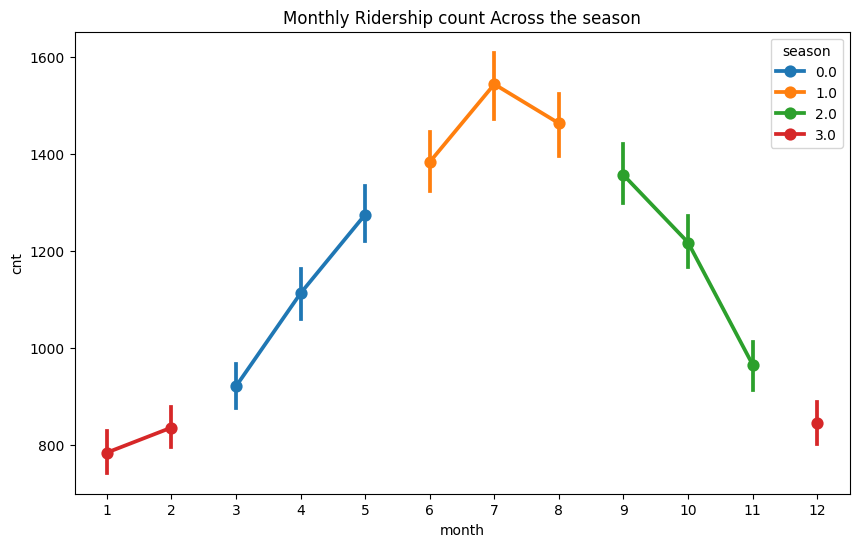

In [28]:
# Visulizing the monthly ridership count across the season

plt.figure(figsize=(10, 6))

sns.pointplot(x=df["month"], y=df["cnt"], hue=df["season"],ax=plt.gca())
plt.title("Monthly Ridership count Across the season")


**The above plot show us that low raidership count in winter, then count increase in sprint due to good weather and reach the peak in summer season and then go downord in fall.** 

Text(0.5, 1.0, 'Raidership Count Distribution in weekends Across the season')

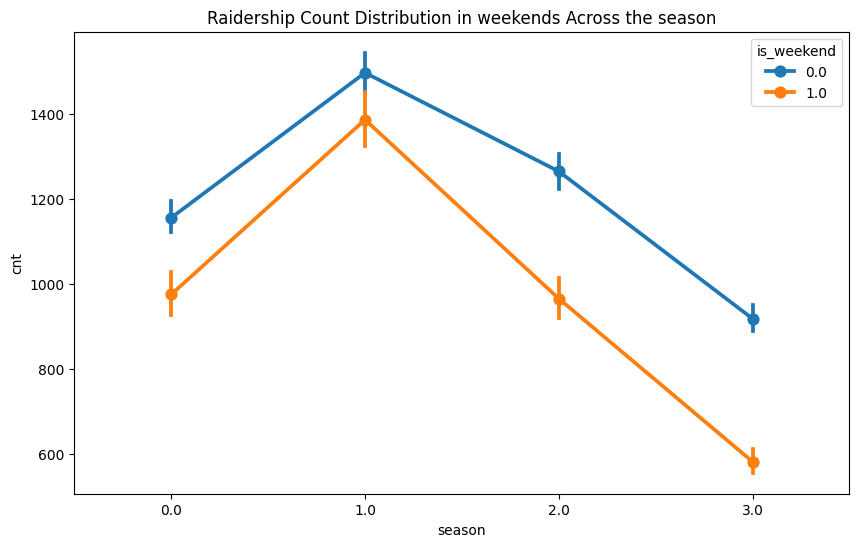

In [32]:
# Similary we will see the weekends raidership count distrivution
plt.figure(figsize=(10, 6))

sns.pointplot(x=df["season"], y=df["cnt"], hue=df["is_weekend"])

plt.title("Raidership Count Distribution in weekends Across the season")

The above plot show that on the work days bike ridership is greater than on weekend's. And in the summer both count are matching. and decreasing in winter. Summary is on the work day bike use is more than weekends

Text(0.5, 1.0, 'Month-wise ridership distribution')

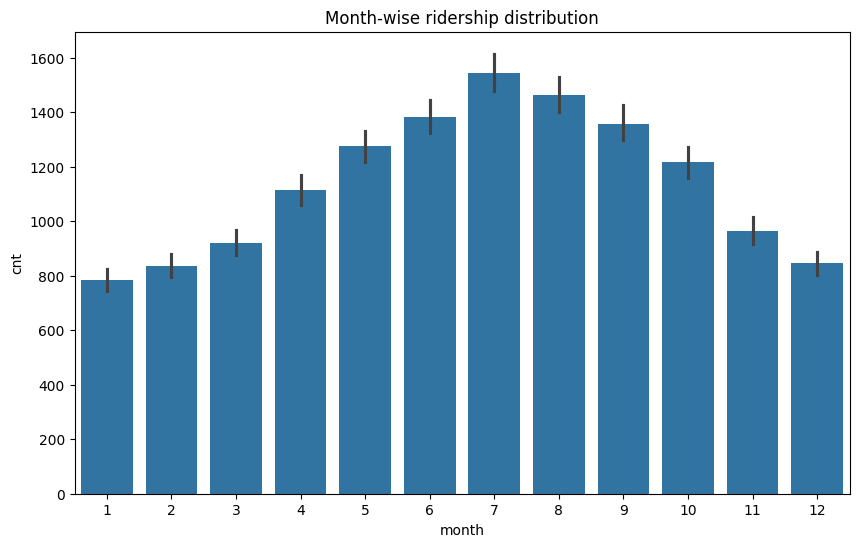

In [33]:
# Now will see how much ridership count is affected across the month
plt.figure(figsize=(10, 6))

sns.barplot(x=df["month"], y=df["cnt"])
plt.title("Month-wise ridership distribution")

The above plot show that in mid months 6, 7, 8 bike distribution is more and the reason is summer season. And less use in winter season like 12, 1 months

Text(0.5, 1.0, 'Year-wise distribution of ridership counts')

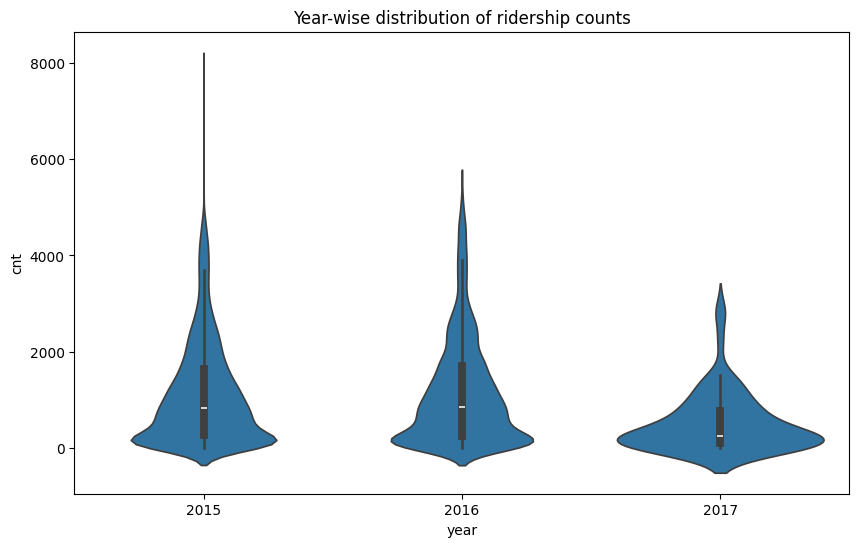

In [34]:
# Let's look to the year distribution of the ridership count distribution

plt.figure(figsize=(10, 6))
sns.violinplot(x=df["year"], y=df["cnt"])
plt.title(f"Year-wise distribution of ridership counts")

In the above violinplot, we see the that in the 2015 and 2016 bike count distibution is more then 2017 year 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  category      
 7   is_holiday    17414 non-null  category      
 8   is_weekend    17414 non-null  category      
 9   season        17414 non-null  category      
 10  month         17414 non-null  category      
 11  year          17414 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 970.5 KB


Text(0.5, 1.0, 'Outliers in the dataset')

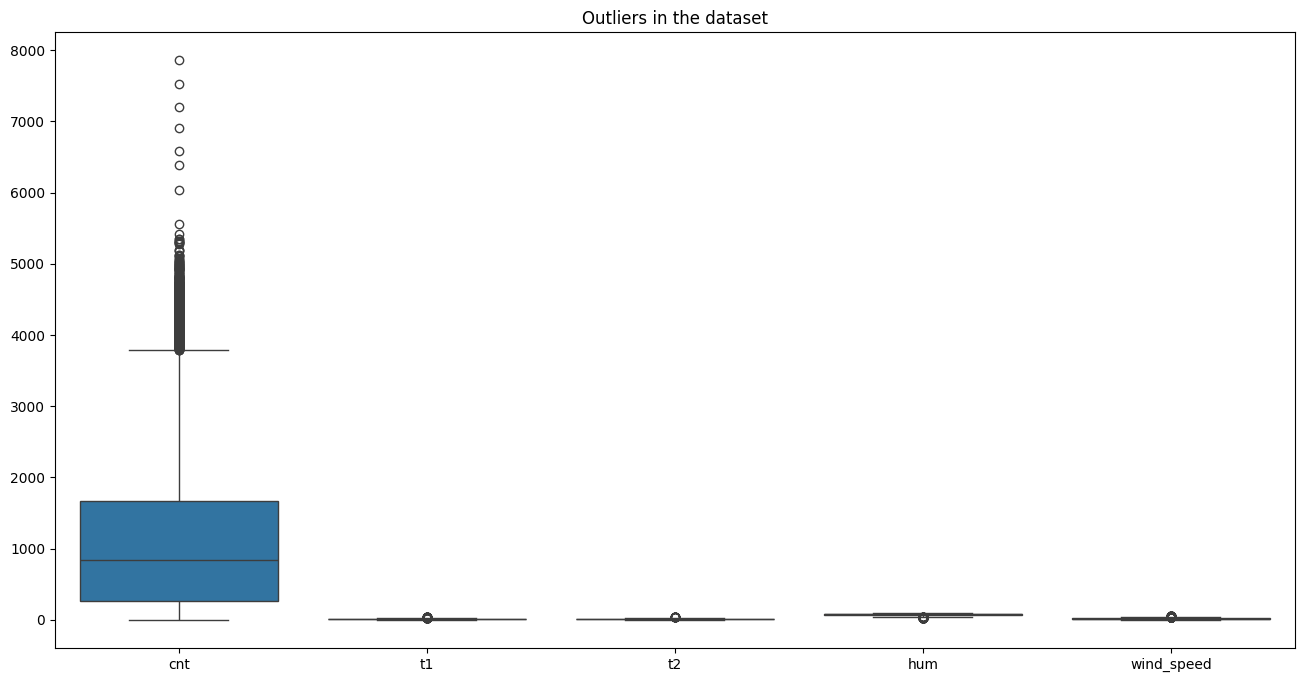

In [40]:
# Check the outliers in the dataset

features = df[["cnt", "t1", "t2", "hum", "wind_speed"]]
plt.figure(figsize=(16, 8))
sns.boxplot(features)
plt.title(f"Outliers in the dataset")


In the above plot we can see that count features have outliers and also in t1, t2, humidity and in wind speed features have outliers

In [42]:
def find_outliers(feature_name):

    q1 = feature_name.quantile(0.25)
    q3 = feature_name.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return lower_bound, upper_bound

In [44]:
# Remove outliers 

lower_cnt, upper_cnt = find_outliers(df["cnt"])
lower_t1, upper_t1 = find_outliers(df["t1"])
lower_t2, upper_t2 = find_outliers(df["t2"])
lower_hum, upper_hum = find_outliers(df["hum"])
lower_windspeed, upper_windspeed = find_outliers(df["wind_speed"])

print(f"lower cnt : {lower_cnt}, Upper Count : {upper_cnt}")
print(f"Lower T1 :{lower_t1}, Upper T1 : {upper_t1}")
print(f"Lower T2 : {lower_t2}, Upper T2 : {upper_t2}")
print(f"Lower Hum : {lower_hum}, Upper Hum : {upper_hum}")
print(f"Lower Wind speed : {lower_windspeed}, Upper Windspeed : {upper_windspeed}")

lower cnt : -1865.125, Upper Count : 3793.875
Lower T1 :-4.0, Upper T1 : 28.0
Lower T2 : -9.0, Upper T2 : 31.0
Lower Hum : 33.0, Upper Hum : 113.0
Lower Wind speed : -5.75, Upper Windspeed : 36.25


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  category      
 7   is_holiday    17414 non-null  category      
 8   is_weekend    17414 non-null  category      
 9   season        17414 non-null  category      
 10  month         17414 non-null  category      
 11  year          17414 non-null  int32         
dtypes: category(5), datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 970.5 KB


In [49]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(min_capping_dict={"cnt" : lower_cnt, "t1" : lower_t1, "t2" : lower_t2, "hum" : lower_hum, "wind_speed" : lower_windspeed}, max_capping_dict={"cnt" : upper_cnt, "t1" : upper_t1, "t2" : upper_t2, "hum" : upper_hum, "wind_speed" : upper_windspeed})

# Fit on datset

df = arb.fit_transform(df)

Text(0.5, 1.0, 'After Removing outliers')

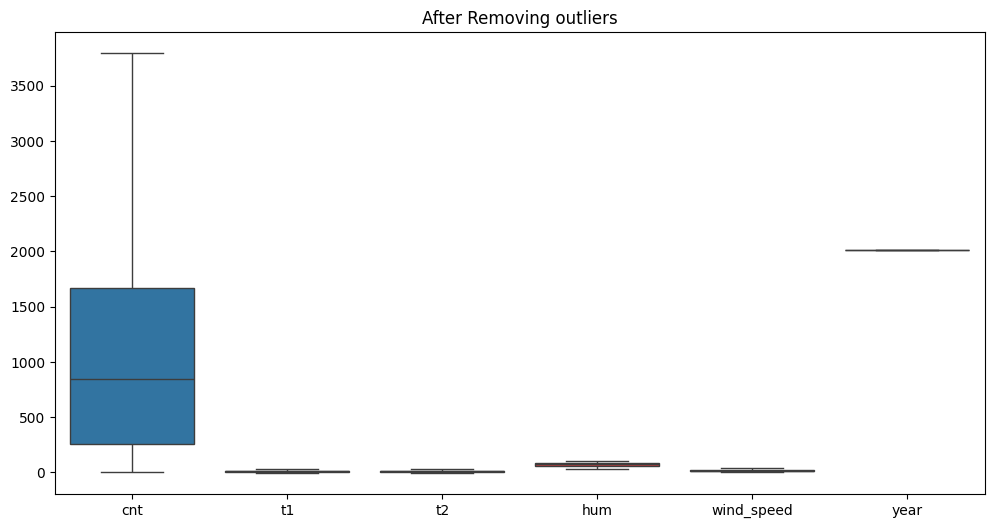

In [50]:
# Check the outliers

plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.title("After Removing outliers")

<Axes: >

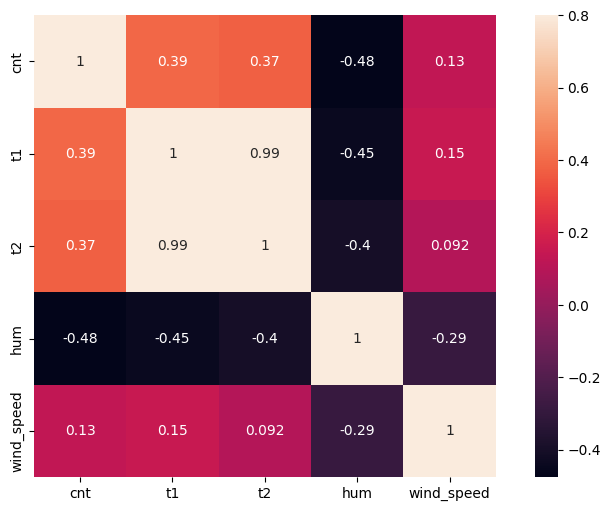

In [61]:
# Check the correlation between data attributes
num_features = [feature for feature in df.columns if df[feature].dtype in ["int", "float"]]

corr_ = df[num_features].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_, annot=True, square=True, vmax=0.8)

In [65]:
df = df.drop("timestamp", axis=1)

In [172]:
num_features = [feature for feature in df.columns if df[feature].dtypes in [int, float]]
cat_features = [feature for feature in df.columns if df[feature].dtypes not in [int, float]]

num_features, cat_features

(['cnt', 't1', 't2', 'hum', 'wind_speed'],
 ['weather_code', 'is_holiday', 'is_weekend', 'season', 'month', 'year'])

In [180]:
# OneHotEncoding to Categorical attributes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore", dtype=int)

encoded_df = encoder.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(cat_features))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2016,year_2017
0,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
1,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
2,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
3,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
4,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Drop Repeated Features

encoded_df = encoded_df.drop(["weather_code", "is_holiday", "is_weekend", "season", "month", "year"], axis=1)

In [173]:
num_features.remove("cnt")

In [182]:
num_features

['t1', 't2', 'hum', 'wind_speed']

In [183]:
# Standardize 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(encoded_df[num_features])

scaler_df = pd.DataFrame(scaled_df, columns=["scaled_t1", "scaled_t2", "scaled_hum", "scaled_windspeed"])


In [184]:
encoded_df = pd.concat([scaler_df, encoded_df], axis=1)

In [185]:
encoded_df.head()

,scaled_t1,scaled_t2,scaled_hum,scaled_windspeed,cnt,t1,t2,hum,wind_speed,weather_code_2.0,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2016,year_2017
0,-1.706486,-1.440190,1.448190,-1.278900,182.0,3.0,2.0,93.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.706486,-1.364543,1.448190,-1.408719,138.0,3.0,2.5,93.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.796692,-1.364543,1.693538,-2.057816,134.0,2.5,2.5,96.5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.886897,-1.440190,1.938886,-2.057816,72.0,2.0,2.0,100.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.886897,-1.742779,1.448190,-1.213990,47.0,2.0,0.0,93.0,6.5,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
# Drop Repeated Features

encoded_df = encoded_df.drop(num_features, axis=1)

In [188]:
encoded_df.head()

,scaled_t1,scaled_t2,scaled_hum,scaled_windspeed,cnt,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2016,year_2017
0,-1.706486,-1.440190,1.448190,-1.278900,182.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.706486,-1.364543,1.448190,-1.408719,138.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.796692,-1.364543,1.693538,-2.057816,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.886897,-1.440190,1.938886,-2.057816,72.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.886897,-1.742779,1.448190,-1.213990,47.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("cnt", axis=1), encoded_df["cnt"], test_size=0.2, random_state=42)

In [190]:
X_train

,scaled_t1,scaled_t2,scaled_hum,scaled_windspeed,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2016,year_2017
12059,0.187831,0.299697,-0.514597,0.278931,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4870,0.278036,0.375345,1.097692,0.019293,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11820,0.368242,0.450992,0.151349,0.149112,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
14753,1.270298,1.207465,-0.094000,-2.057816,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4045,0.368242,0.450992,0.011150,0.473660,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.804431,-0.986306,1.027592,-0.110527,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11964,0.097625,0.224050,0.501846,-0.110527,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5390,0.278036,0.375345,0.677095,-1.408719,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,-1.345664,-1.440190,0.431747,-0.240346,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apply Algorithms 
- Linear Regression
- GradientDescent 
- Regularization

In [191]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [192]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"R2 Score : {r2_score_lr:.2f}%")
print(f"MSE lr : {mse_lr}")
print(f"RMSE Lr : {rmse_lr}")

R2 Score : 0.30%
MSE lr : 746709.4819654723
RMSE Lr : 864.1235339727025


In [193]:
# GradientDescent
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=5000)

sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

In [194]:
r2_score_sgd = r2_score(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print(f"R2 Score : {r2_score_sgd:.2f}%")
print(f"MSE SGD : {mse_sgd}")
print(f"RMSE SGD : {rmse_sgd}")

R2 Score : 0.30%
MSE SGD : 747116.8020962434
RMSE SGD : 864.3591858112247


In [195]:
class GradientDescent:

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        losses = []

        for i in range(self.epochs):

            y_pred = np.dot(X_train, self.coef_)
            
            error = y_train - y_pred
            coef_slope = - (2/X_train.shape[0]) * np.dot((error), X_train)
            self.coef_ = self.coef_ - (self.lr * coef_slope)

            loss = np.mean(error ** 2)

            losses.append(loss)
        
        plt.plot(range(self.epochs), losses)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss across epochs")
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = np.dot(X_test, self.coef_)
        return y_pred


In [206]:
gradient_ = GradientDescent(learning_rate=0.001, epochs=5000)

Coef_: [ 777.95939529  143.30829946   96.33060357 -417.51568995  -30.63937111
  269.88019389  254.6264927   -46.07660631   31.75133895   -2.70086936
    2.24733854  -17.83346916 -101.17793237   72.84063916  216.29563192
  207.27260562   44.04723572  109.094363     96.3160871    76.16565624
   53.34317906    5.15950272   14.31391072   20.91845641  121.49535018
   73.86384727   66.15038235  138.30041616   11.62023144]


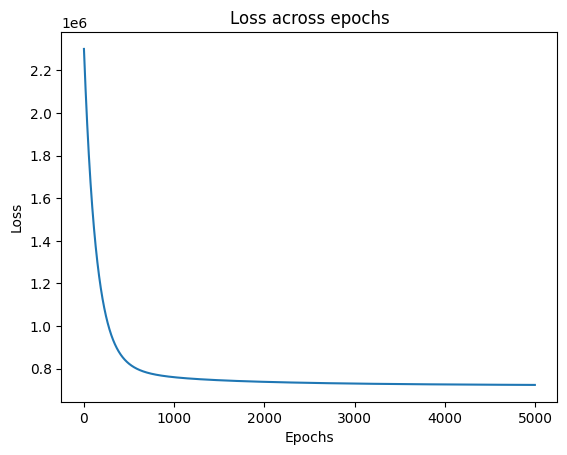

In [207]:
gradient_.fit(X_train, y_train)

In [208]:
y_pred_gradient = gradient_.predict(X_test)

In [209]:
r2_score_gradient = r2_score(y_test, y_pred_gradient)
mse_gradient = mean_squared_error(y_test, y_pred_gradient)
rmse_gradient = np.sqrt(mse_gradient)

In [210]:
print(f"R2 Score Gradient : {r2_score_gradient:.2f}%")
print(f"MSE Gradient : {mse_gradient}")
print(f"RMSE Gradient : {rmse_gradient}")

R2 Score Gradient : 0.28%
MSE Gradient : 759440.9441022761
RMSE Gradient : 871.4590891730237


In [211]:
# Ridge
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [212]:
r2_score_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"R2 score : {r2_score_ridge:.2f}%")
print(f"MSE Ridge : {mse_ridge}")
print(f"RMSE RIDGE : {rmse_ridge}")

R2 score : 0.30%
MSE Ridge : 746717.0657011633
RMSE RIDGE : 864.1279220700852
